#### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset 

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

<img src="dataset_images.jpg" />

In [5]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [11]:
y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

In [13]:
y_train.shape , y_test.shape

((50000,), (10000,))

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Data Visualization

In [20]:
def plot_sample(X, y, sample_indexes):
    for index in sample_indexes:
        plt.figure(figsize = (15,2))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])

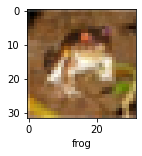

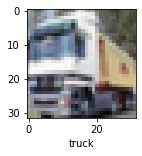

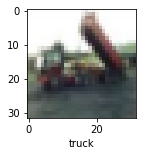

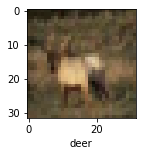

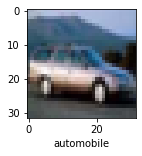

In [22]:
plot_sample(X_train, y_train, range(5))

#### Normalizing the training data

In [23]:
X_train = X_train / 255
X_test = X_test / 255

#### build a convolutional neural network and train our images

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7078 - accuracy: 0.3721
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1379 - accuracy: 0.5992
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9897 - accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9029 - accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8140 - accuracy: 0.7151
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7577 - accuracy: 0.7373
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7166 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6719 - accuracy: 0.76501s - loss: 0.6 - ETA: 0s -
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6242 - accuracy: 0.7819
Epoch 10/10
1563/1563 [===============

#### Evaluate the model

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9093 - accuracy: 0.7035


[0.9093198180198669, 0.703499972820282]

In [31]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.78      0.86      0.82      1000
           2       0.60      0.64      0.62      1000
           3       0.54      0.42      0.47      1000
           4       0.74      0.56      0.64      1000
           5       0.57      0.68      0.62      1000
           6       0.74      0.82      0.78      1000
           7       0.70      0.78      0.74      1000
           8       0.87      0.74      0.80      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



Text(69.0, 0.5, 'Truth')

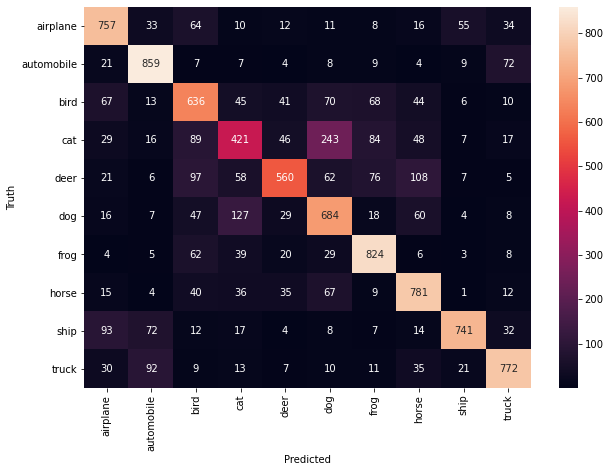

In [33]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(data=cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')